In [57]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as k
import matplotlib.pyplot as plt
import numpy as np

In [58]:
#load mnist dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data() #everytime loading data won't be so easy :)

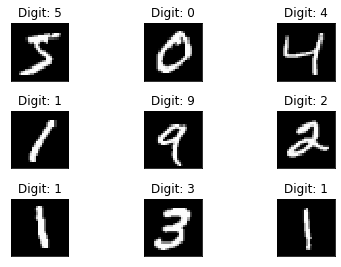

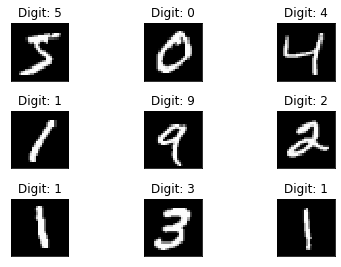

In [59]:
#visualising first 9 data from training dataset
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [60]:
# let's print the actual data shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [61]:
#input image size 28*28
img_rows , img_cols = 28, 28

In [62]:
#reshaping
#this assumes our data format
#For 3D data, "channels_last" assumes (conv_dim1, conv_dim2, conv_dim3, channels) while 
#"channels_first" assumes (channels, conv_dim1, conv_dim2, conv_dim3).
if k.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
#more reshaping
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [63]:
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


In [64]:
#set number of categories
num_category = 10

In [65]:
# convert class vectors to binary class matrices
import tensorflow as tf

y_train = tf.keras.utils.to_categorical(y_train, num_category)
y_test = tf.keras.utils.to_categorical(y_test, num_category)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

#Model Building

In [66]:
model = Sequential()

###convolutional layer with rectified linear unit activation

In [67]:
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

##64 convolution filters used each of size 3x3

In [68]:
model.add(Conv2D(64, (3, 3), activation='relu'))

##choose the best features via pooling

In [69]:
model.add(MaxPooling2D(pool_size=(2, 2)))

##randomly turn neurons on and off to improve convergence

In [70]:
model.add(Dropout(0.25))

##flatten since too many dimensions, we only want a classification output

In [71]:
model.add(Flatten())

##fully connected to get all relevant data

In [72]:
model.add(Dense(128, activation='relu'))

##one more dropout for convergence' sake

In [73]:
model.add(Dropout(0.5))

##output a softmax to squash the matrix into output probabilities

In [74]:
model.add(Dense(num_category, activation='softmax'))

##Adaptive learning rate (adaDelta) is a popular form of gradient descent rivaled only by adam and adagrad
##categorical ce since we have multiple classes (10) 

In [75]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

#Model Summary

In [76]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_16 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 12, 12, 64)        0         
                                                                 
 flatten_6 (Flatten)         (None, 9216)              0         
                                                                 
 dense_12 (Dense)            (None, 128)               1179776   
                                                      

##Model fitting

In [77]:
batch_size = 128
num_epoch = 10
#model training
model_log = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 148s 314ms/step - loss: 2.2864 - accuracy: 0.1546 - val_loss: 2.2577 - val_accuracy: 0.3171
Epoch 2/10
469/469 [==============================] - 147s 314ms/step - loss: 2.2397 - accuracy: 0.2642 - val_loss: 2.2008 - val_accuracy: 0.5319
Epoch 3/10
469/469 [==============================] - 148s 316ms/step - loss: 2.1784 - accuracy: 0.3591 - val_loss: 2.1221 - val_accuracy: 0.5997
Epoch 4/10
469/469 [==============================] - 147s 315ms/step - loss: 2.0941 - accuracy: 0.4252 - val_loss: 2.0127 - val_accuracy: 0.6414
Epoch 5/10
469/469 [==============================] - 148s 315ms/step - loss: 1.9788 - accuracy: 0.4784 - val_loss: 1.8633 - val_accuracy: 0.6921
Epoch 6/10
469/469 [==============================] - 148s 315ms/step - loss: 1.8280 - accuracy: 0.5293 - val_loss: 1.6737 - val_accuracy: 0.7376
Epoch 7/10
469/469 [==============================] - 148s 316ms/step - loss: 1.6543 - accuracy: 0.5723 - val_loss: 1.4603 -

##Model Evaluation

In [82]:
#how well did it do? 
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 7s 22ms/step - loss: 0.9292 - accuracy: 0.8138
Test loss: 0.9291602373123169
Test accuracy: 0.8137999773025513


##Plotting Model Accuracy

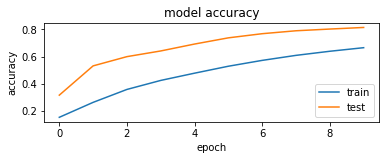

In [83]:
import os
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')



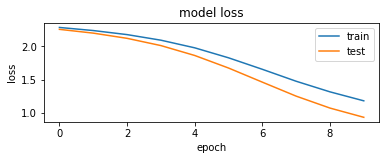

In [84]:
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')



##Saving the Model

In [85]:
#Save the model
# serialize model to JSON
model_digit_json = model.to_json()
with open("model_digit.json", "w") as json_file:
    json_file.write(model_digit_json)
# serialize weights to HDF5
model.save_weights("model_digit.h5")
print("Saved model to disk")

Saved model to disk
